#Session 30. Advanced Data Preprocessing for Text


#imbalanced dataset

### read dataset

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/healthcare-dataset-stroke-data.csv', delimiter=',')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


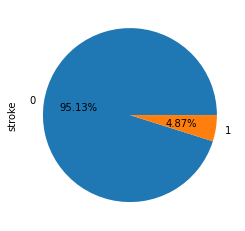

In [ ]:
import matplotlib.pyplot as plt

data = df['stroke'].value_counts()
data.plot(kind='pie',autopct='%.2f%%')
plt.show() 

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## random under sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

under_sampling = RandomUnderSampler(random_state=0)
df_X = df.drop(['id', 'stroke'], axis=1)
df_y = df['stroke']
#imputation
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)

#categorical encoding
le = LabelEncoder()
df_X['gender'] = le.fit_transform(df_X['gender'])
df_X['ever_married'] = le.fit_transform(df_X['ever_married'])
df_X['work_type'] = le.fit_transform(df_X['work_type'])
df_X['Residence_type'] = le.fit_transform(df_X['Residence_type'])
df_X['smoking_status'] = le.fit_transform(df_X['smoking_status'])

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

X_resampled, y_resampled = under_sampling.fit_resample(X_train, y_train)

print('sebelum undersampling')
print(pd.DataFrame(y_train).value_counts())
print('setelah undersampling')
print(pd.DataFrame(y_resampled).value_counts())

sebelum undersampling
0.0    3663
1.0     169
dtype: int64
setelah undersampling
0.0    169
1.0    169
dtype: int64


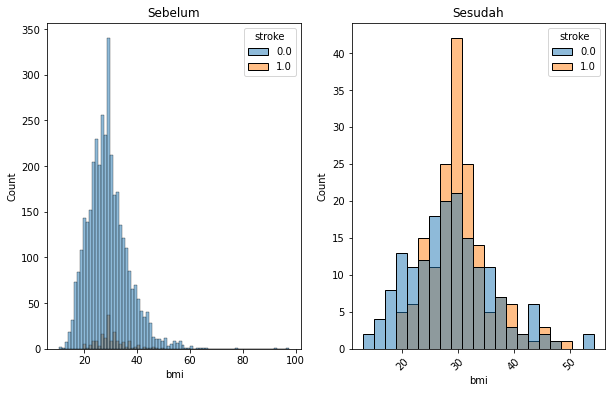

In [ ]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

dfx_ori= pd.DataFrame(X_train, columns=df_X.columns)
dfy_ori = pd.DataFrame(y_train, columns=['stroke'])
df_sebelum = pd.concat([dfx_ori, dfy_ori], axis=1)

dfx_res = pd.DataFrame(X_resampled, columns=df_X.columns)
dfy_res = pd.DataFrame(y_resampled, columns=['stroke'])
df_sesudah = pd.concat([dfx_res, dfy_res], axis=1)

f, axes = plt.subplots(1,2, figsize=(10, 6))
sns.histplot(data=df_sebelum, x='bmi',hue='stroke', ax=axes[0]).set(title='Sebelum') 
sns.histplot(data=df_sesudah, x='bmi',hue='stroke', ax=axes[1]).set(title='Sesudah') 
plt.xticks(rotation='45')                                  
plt.show()

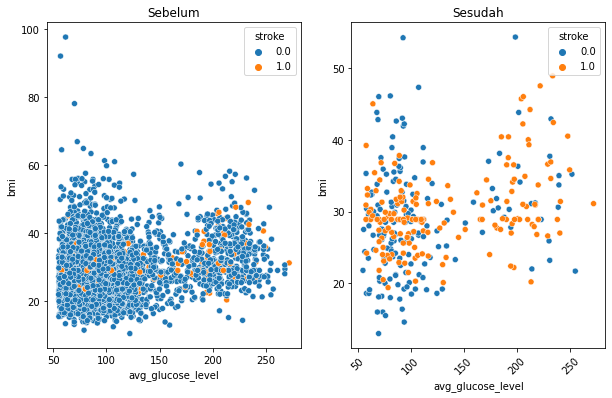

In [ ]:
import seaborn as sns

f, axes = plt.subplots(1,2, figsize=(10, 6))
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df_sebelum, hue='stroke', ax=axes[0]).set(title='Sebelum') 
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df_sesudah, hue='stroke', ax=axes[1]).set(title='Sesudah') 
plt.xticks(rotation='45')                                  
plt.show()

## oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

over_sampling = RandomOverSampler(random_state=0)
df_X = df.drop(['id', 'stroke'], axis=1)
df_y = df['stroke']
#imputation
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)

#categorical encoding
le = LabelEncoder()
df_X['gender'] = le.fit_transform(df_X['gender'])
df_X['ever_married'] = le.fit_transform(df_X['ever_married'])
df_X['work_type'] = le.fit_transform(df_X['work_type'])
df_X['Residence_type'] = le.fit_transform(df_X['Residence_type'])
df_X['smoking_status'] = le.fit_transform(df_X['smoking_status'])

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

X_resampled, y_resampled = over_sampling.fit_resample(X_train, y_train)

print('sebelum random oversampling')
print(pd.DataFrame(y_train).value_counts())
print('setelah random oversampling')
print(pd.DataFrame(y_resampled).value_counts())

sebelum random oversampling
0.0    3663
1.0     169
dtype: int64
setelah random oversampling
0.0    3663
1.0    3663
dtype: int64


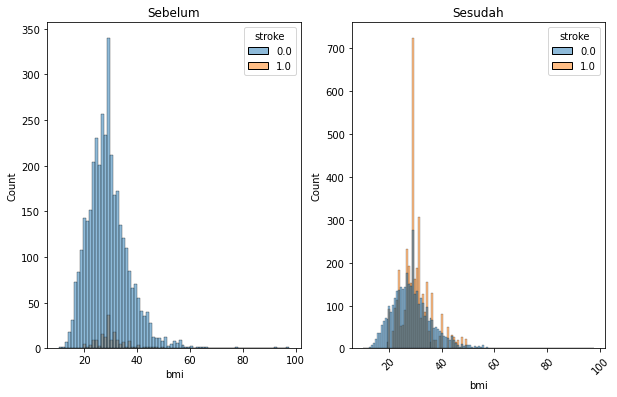

In [ ]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

dfx_ori= pd.DataFrame(X_train, columns=df_X.columns)
dfy_ori = pd.DataFrame(y_train, columns=['stroke'])
df_sebelum = pd.concat([dfx_ori, dfy_ori], axis=1)

dfx_res = pd.DataFrame(X_resampled, columns=df_X.columns)
dfy_res = pd.DataFrame(y_resampled, columns=['stroke'])
df_sesudah = pd.concat([dfx_res, dfy_res], axis=1)

f, axes = plt.subplots(1,2, figsize=(10, 6))
sns.histplot(data=df_sebelum, x='bmi',hue='stroke', ax=axes[0]).set(title='Sebelum') 
sns.histplot(data=df_sesudah, x='bmi',hue='stroke', ax=axes[1]).set(title='Sesudah') 
plt.xticks(rotation='45')                                  
plt.show()

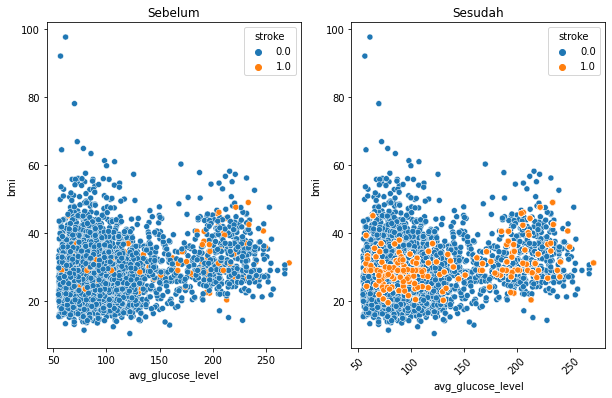

In [ ]:
import seaborn as sns

f, axes = plt.subplots(1,2, figsize=(10, 6))
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df_sebelum, hue='stroke', ax=axes[0]).set(title='Sebelum') 
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df_sesudah, hue='stroke', ax=axes[1]).set(title='Sesudah') 
plt.xticks(rotation='45')                                  
plt.show()

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df_X = df.drop(['id','stroke'],axis=1)
df_y = df['stroke']
#imputation
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)
#categorical encoding
le = LabelEncoder()
df_X['gender'] = le.fit_transform(df_X['gender'])
df_X['ever_married'] = le.fit_transform(df_X['ever_married'])
df_X['work_type'] = le.fit_transform(df_X['work_type'])
df_X['Residence_type'] = le.fit_transform(df_X['Residence_type'])
df_X['smoking_status'] = le.fit_transform(df_X['smoking_status'])

X = df_X.astype(float).values
y = df_y.astype(float).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print('Sebelum SMOTE')
print(pd.DataFrame(y_train).value_counts())
print('Setelah SMOTE')
print(pd.DataFrame(y_resampled).value_counts())

Sebelum SMOTE
0.0    3663
1.0     169
dtype: int64
Setelah SMOTE
0.0    3663
1.0    3663
dtype: int64


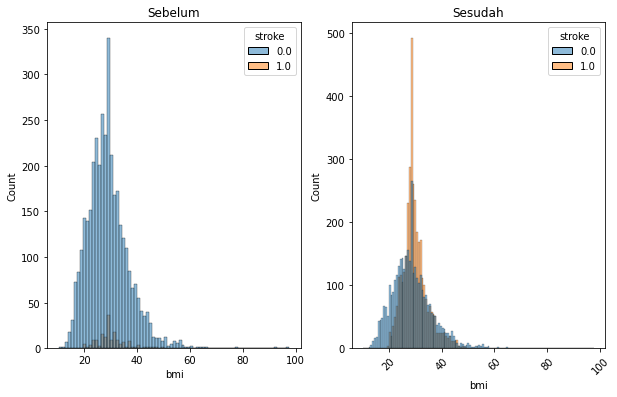

In [ ]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

dfx_ori= pd.DataFrame(X_train, columns=df_X.columns)
dfy_ori = pd.DataFrame(y_train, columns=['stroke'])
df_sebelum = pd.concat([dfx_ori, dfy_ori], axis=1)

dfx_res = pd.DataFrame(X_resampled, columns=df_X.columns)
dfy_res = pd.DataFrame(y_resampled, columns=['stroke'])
df_sesudah = pd.concat([dfx_res, dfy_res], axis=1)

f, axes = plt.subplots(1,2, figsize=(10, 6))
sns.histplot(data=df_sebelum, x='bmi',hue='stroke', ax=axes[0]).set(title='Sebelum') 
sns.histplot(data=df_sesudah, x='bmi',hue='stroke', ax=axes[1]).set(title='Sesudah') 
plt.xticks(rotation='45')                                  
plt.show()

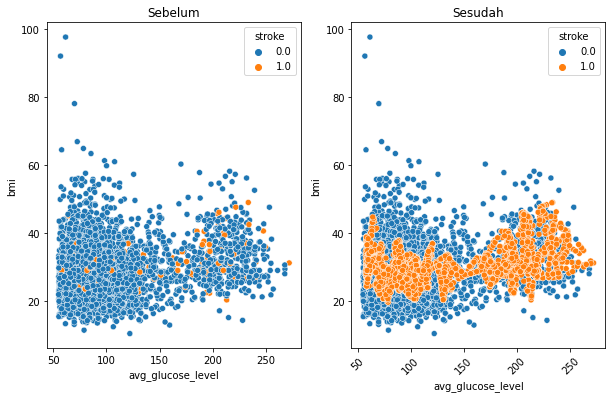

In [ ]:
import seaborn as sns

f, axes = plt.subplots(1,2, figsize=(10, 6))
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df_sebelum, hue='stroke', ax=axes[0]).set(title='Sebelum') 
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df_sesudah, hue='stroke', ax=axes[1]).set(title='Sesudah') 
plt.xticks(rotation='45')                                  
plt.show()

## ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df_X = df.drop(['id','stroke'],axis=1)
df_y = df['stroke']
#imputation
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)
#categorical encoding
le = LabelEncoder()
df_X['gender'] = le.fit_transform(df_X['gender'])
df_X['ever_married'] = le.fit_transform(df_X['ever_married'])
df_X['work_type'] = le.fit_transform(df_X['work_type'])
df_X['Residence_type'] = le.fit_transform(df_X['Residence_type'])
df_X['smoking_status'] = le.fit_transform(df_X['smoking_status'])

X = df_X.astype(float).values
y = df_y.astype(float).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
adasyn = ADASYN(random_state=0)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)
print('Sebelum ADASYN')
print(pd.DataFrame(y_train).value_counts())
print('Setelah ADASYIN')
print(pd.DataFrame(y_resampled).value_counts())

Sebelum ADASYN
0.0    3663
1.0     169
dtype: int64
Setelah ADASYIN
1.0    3676
0.0    3663
dtype: int64


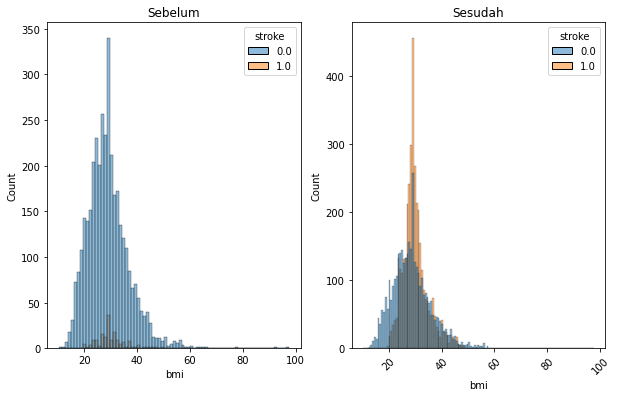

In [ ]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

dfx_ori= pd.DataFrame(X_train, columns=df_X.columns)
dfy_ori = pd.DataFrame(y_train, columns=['stroke'])
df_sebelum = pd.concat([dfx_ori, dfy_ori], axis=1)

dfx_res = pd.DataFrame(X_resampled, columns=df_X.columns)
dfy_res = pd.DataFrame(y_resampled, columns=['stroke'])
df_sesudah = pd.concat([dfx_res, dfy_res], axis=1)

f, axes = plt.subplots(1,2, figsize=(10, 6))
sns.histplot(data=df_sebelum, x='bmi',hue='stroke', ax=axes[0]).set(title='Sebelum') 
sns.histplot(data=df_sesudah, x='bmi',hue='stroke', ax=axes[1]).set(title='Sesudah') 
plt.xticks(rotation='45')                                  
plt.show()

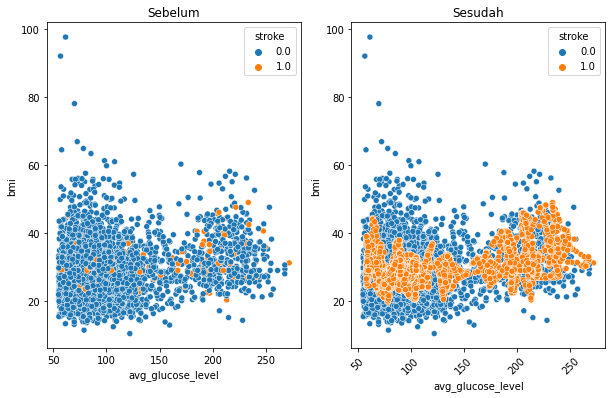

In [ ]:
import seaborn as sns

f, axes = plt.subplots(1,2, figsize=(10, 6))
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df_sebelum, hue='stroke', ax=axes[0]).set(title='Sebelum') 
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df_sesudah, hue='stroke', ax=axes[1]).set(title='Sesudah') 
plt.xticks(rotation='45')                                  
plt.show()

# Read dataset

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/Tweets.csv', delimiter=',')
#df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/IMDB_small_size.csv', delimiter=',')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.shape

(14640, 15)

## resize dataset

In [ ]:
df_resize = df.iloc[:1000]
df_resize.shape

(1000, 15)

## Remove neutral

In [ ]:
df_resize = df_resize[df_resize.airline_sentiment	 != 'neutral']

In [ ]:
df_resize.shape

(728, 15)

In [ ]:
df_resize.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)


## tokenization

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df_text = df_resize['text'].astype(str)
df_class = df_resize['airline_sentiment']
lines = df_text.values.tolist()

list_tokens = list()
for line in lines:
  line = line.replace("@VirginAmerica","")
  line = line.replace("@united","")
  tokens = word_tokenize(line)
  list_tokens.append(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
list_tokens[0]

['plus',
 'you',
 "'ve",
 'added',
 'commercials',
 'to',
 'the',
 'experience',
 '...',
 'tacky',
 '.']

## tokenization, removing stopwords, stemming

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


df_text = df_resize['text'].astype(str)
df_class = df_resize['airline_sentiment']
lines = df_text.values.tolist()
list_tokens_stem = list()
porter = PorterStemmer()

for line in lines:
  line = line.replace("@VirginAmerica","")
  line = line.replace("@united","")
  tokens = word_tokenize(line)
  # merubah tokens menjadi huruf kecil semua
  tokens = [w.lower() for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  # menghapus stop words
  tokens = [word for word in tokens if not word in stopwords.words()]
  # melakukan stemming
  tokens = [porter.stem(word) for word in tokens]
  list_tokens_stem.append(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(lines[0])
print(list_tokens_stem[0])


@VirginAmerica plus you've added commercials to the experience... tacky.
['plu', 'ad', 'commerci', 'experi', 'tacki']


## removing stopword + lemmatization

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


df_text = df_resize['text'].astype(str)
df_class = df_resize['airline_sentiment']
lines = df_text.values.tolist()
list_tokens_lemma = list()
#porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

for line in lines:
  line = line.replace("@VirginAmerica","")
  line = line.replace("@united","")
  tokens = word_tokenize(line)
  # merubah tokens menjadi huruf kecil semua
  tokens = [w.lower() for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  # menghapus stop words
  tokens = [word for word in tokens if not word in stopwords.words()]
  # melakukan stemming
  #tokens = [porter.stem(word) for word in tokens]
  # melakukan lemmatization
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  list_tokens_lemma.append(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
print(lines[0])
list_tokens_lemma[0]

@VirginAmerica plus you've added commercials to the experience... tacky.


['plus', 'added', 'commercial', 'experience', 'tacky']

# Feature Extraction

## bag of words

### contoh sederhana

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
doc1 = "saya belajar pemrograman dan belajar melukis"
doc2 = "saya membantu adik saya belajar menulis"
doc3 = "ibu belajar menjahit"

new_doc = [doc1, doc2, doc3]

vectorizer = CountVectorizer()
X_input = vectorizer.fit_transform(new_doc)

print(vectorizer.get_feature_names())
print(X_input.toarray())

print(vectorizer.vocabulary_)

['adik', 'belajar', 'dan', 'ibu', 'melukis', 'membantu', 'menjahit', 'menulis', 'pemrograman', 'saya']
[[0 2 1 0 1 0 0 0 1 1]
 [1 1 0 0 0 1 0 1 0 2]
 [0 1 0 1 0 0 1 0 0 0]]
{'saya': 9, 'belajar': 1, 'pemrograman': 8, 'dan': 2, 'melukis': 4, 'membantu': 5, 'adik': 0, 'menulis': 7, 'ibu': 3, 'menjahit': 6}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
new_doc

['saya belajar pemrograman dan belajar melukis',
 'saya membantu adik saya belajar menulis',
 'ibu belajar menjahit']

## airline dataset

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

new_doc = list()
#ambil dari hasil lemmatization misalnya
for doc in list_tokens_lemma:
  row = ' '.join(doc)
  new_doc.append(row)

vectorizer = CountVectorizer(max_features=1000)
X_input_bow = vectorizer.fit_transform(new_doc)

In [ ]:
list_tokens_lemma[:10]

[['plus', 'added', 'commercial', 'experience', 'tacky'],
 ['really',
  'aggressive',
  'blast',
  'obnoxious',
  'entertainment',
  'guest',
  'face',
  'amp',
  'little',
  'recourse'],
 ['really', 'big', 'bad', 'thing'],
 ['seriously',
  'would',
  'pay',
  'flight',
  'seat',
  'playing',
  'really',
  'bad',
  'thing',
  'flying'],
 ['yes', 'nearly', 'every', 'time', 'fly', 'vx', 'ear', 'worm', 'go', 'away'],
 ['virginamerica', 'well'],
 ['amazing', 'arrived', 'hour', 'early', 'good'],
 ['lt', 'pretty', 'graphic', 'much', 'better', 'minimal', 'iconography'],
 ['great',
  'deal',
  'already',
  'thinking',
  'trip',
  'australia',
  'amp',
  'even',
  'gone',
  'trip',
  'yet',
  'p'],
 ['virginmedia',
  'flying',
  'fabulous',
  'seductive',
  'sky',
  'stress',
  'away',
  'travel',
  'http']]

In [ ]:
new_doc[:10]

['plus added commercial experience tacky',
 'really aggressive blast obnoxious entertainment guest face amp little recourse',
 'really big bad thing',
 'seriously would pay flight seat playing really bad thing flying',
 'yes nearly every time fly vx ear worm go away',
 'virginamerica well',
 'amazing arrived hour early good',
 'lt pretty graphic much better minimal iconography',
 'great deal already thinking trip australia amp even gone trip yet p',
 'virginmedia flying fabulous seductive sky stress away travel http']

In [ ]:
print(vectorizer.get_feature_names())
print(X_input_bow.toarray())
print(vectorizer.vocabulary_)
print(X_input_bow.shape)


['able', 'absolute', 'access', 'account', 'actually', 'add', 'added', 'adding', 'additional', 'address', 'advance', 'afford', 'agent', 'ago', 'ahead', 'air', 'aircraft', 'airline', 'airport', 'already', 'always', 'amazing', 'america', 'americanair', 'amp', 'angry', 'another', 'answer', 'answering', 'anxiety', 'anyone', 'anything', 'anyway', 'anywhere', 'apology', 'app', 'apparently', 'applied', 'appreciate', 'appropriate', 'around', 'arrived', 'arrives', 'arriving', 'asap', 'ase', 'ask', 'asked', 'asking', 'assist', 'assistance', 'atrocious', 'attendant', 'austin', 'avail', 'available', 'aviv', 'award', 'away', 'awesome', 'back', 'bad', 'bag', 'baggage', 'bank', 'bday', 'behind', 'best', 'better', 'big', 'bin', 'birthday', 'bit', 'board', 'boarded', 'boarding', 'book', 'booked', 'booking', 'bos', 'boston', 'bought', 'brand', 'break', 'broken', 'browser', 'bug', 'business', 'button', 'buy', 'cabin', 'cake', 'call', 'called', 'calling', 'came', 'cancelled', 'cant', 'captain', 'car', 'car

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## TF-IDF

### contoh sederhana

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
doc1 = "saya belajar pemrograman dan belajar melukis"
doc2 = "saya membantu adik saya belajar menulis"
doc3 = "ibu belajar menjahit"
new_doc = [doc1, doc2, doc3]

tfidf_vectorizer = TfidfVectorizer(norm=None, smooth_idf=False)
#ketika parameter smooth_idf=False, maka rumus idf menjadi idf(t) = log [ n / df(t) ] + 1
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer
X_input = tfidf_vectorizer.fit_transform(new_doc)

print(tfidf_vectorizer.get_feature_names())
print(X_input.toarray())
print(tfidf_vectorizer.vocabulary_)

['adik', 'belajar', 'dan', 'ibu', 'melukis', 'membantu', 'menjahit', 'menulis', 'pemrograman', 'saya']
[[0.         2.         2.09861229 0.         2.09861229 0.
  0.         0.         2.09861229 1.40546511]
 [2.09861229 1.         0.         0.         0.         2.09861229
  0.         2.09861229 0.         2.81093022]
 [0.         1.         0.         2.09861229 0.         0.
  2.09861229 0.         0.         0.        ]]
{'saya': 9, 'belajar': 1, 'pemrograman': 8, 'dan': 2, 'melukis': 4, 'membantu': 5, 'adik': 0, 'menulis': 7, 'ibu': 3, 'menjahit': 6}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import math
#adik di dokumen ke-2
1 * (math.log (3/ 1) + 1)

2.09861228866811

In [ ]:
#saya di dokumen ke-2
2 * (math.log (3/ 2) + 1)

2.8109302162163288

In [ ]:
#belajar di dokumen ke-1
2 * (math.log (3 / 3) + 1)

2.0

## airline dataset

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
new_doc = list()
# ambil dari hasil lemmatization misalnya
for doc in list_tokens_lemma:
  row = ' '.join(doc)
  new_doc.append(row)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_input_tfidf = tfidf_vectorizer.fit_transform(new_doc)

In [ ]:
print(tfidf_vectorizer.get_feature_names())
print(X_input_tfidf.toarray())
print(tfidf_vectorizer.vocabulary_)
print(X_input_tfidf.shape)

['able', 'absolute', 'access', 'account', 'actually', 'add', 'added', 'adding', 'additional', 'address', 'advance', 'afford', 'agent', 'ago', 'ahead', 'air', 'aircraft', 'airline', 'airport', 'already', 'always', 'amazing', 'america', 'americanair', 'amp', 'angry', 'another', 'answer', 'answering', 'anxiety', 'anyone', 'anything', 'anyway', 'anywhere', 'apology', 'app', 'apparently', 'applied', 'appreciate', 'appropriate', 'around', 'arrived', 'arrives', 'arriving', 'asap', 'ase', 'ask', 'asked', 'asking', 'assist', 'assistance', 'atrocious', 'attendant', 'austin', 'avail', 'available', 'aviv', 'award', 'away', 'awesome', 'back', 'bad', 'bag', 'baggage', 'bank', 'bday', 'behind', 'best', 'better', 'big', 'bin', 'birthday', 'bit', 'board', 'boarded', 'boarding', 'book', 'booked', 'booking', 'bos', 'boston', 'bought', 'brand', 'break', 'broken', 'browser', 'bug', 'business', 'button', 'buy', 'cabin', 'cake', 'call', 'called', 'calling', 'came', 'cancelled', 'cant', 'captain', 'car', 'car

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Classification models

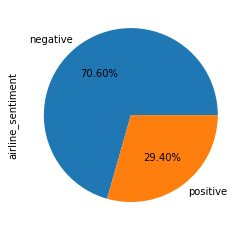

In [ ]:
import matplotlib.pyplot as plt

data = df_resize['airline_sentiment'].value_counts()
data.plot(kind='pie',autopct='%.2f%%')
plt.show() 

## MLP + BOW

Accuracy  0.8447488584474886
Precision  0.8169354838709677
Recall  0.8113487819370173
Confusion matrix  [[137  16]
 [ 18  48]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


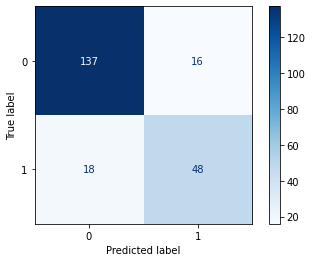

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier


# get X and y
df_X = X_input_bow
df_y = df_resize['airline_sentiment']

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

#label encoding for y
le = LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.fit_transform(y_test)

#mulai learning 
model=MLPClassifier(max_iter=1000)
#model=MLPClassifier(max_iter=1000, random_state=42, activation='logistic')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
df_X.shape

(728, 1000)

## MLP + TFIDF

Accuracy  0.863013698630137
Precision  0.8214285714285714
Recall  0.696969696969697
Confusion matrix  [[143  10]
 [ 20  46]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


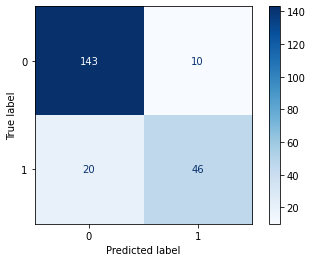

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier


# get X and y
df_X = X_input_tfidf
df_y = df_resize['airline_sentiment']

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

#label encoding for y
le = LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.fit_transform(y_test)

#mulai learning 
model=MLPClassifier(max_iter=1000)
#model=MLPClassifier(max_iter=1000, random_state=42, activation='logistic')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred))  
print('Recall ',recall_score(y_test, y_pred)) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# Word Cloud

graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text

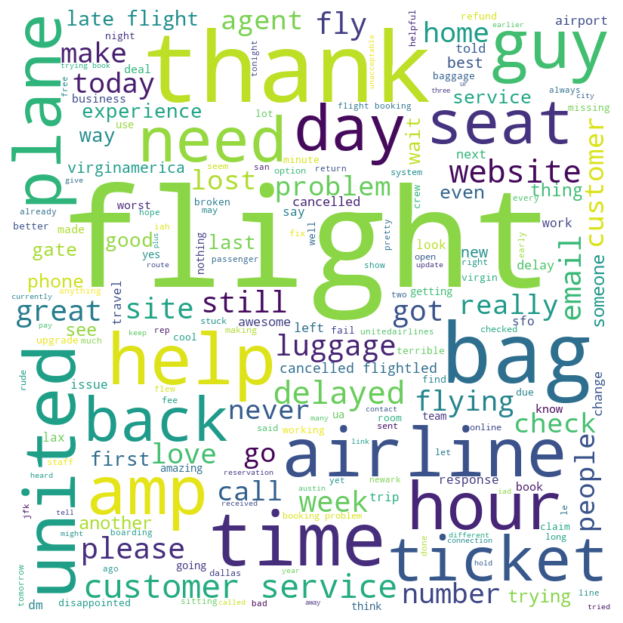

In [ ]:
from wordcloud import WordCloud

text = ' '.join(new_doc)
wordcloud = WordCloud(width = 800, height = 800, background_color="white")
wordcloud = wordcloud.generate_from_text(text)
# Display the generated image:
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
text

'plus added commercial experience tacky really aggressive blast obnoxious entertainment guest face amp little recourse really big bad thing seriously would pay flight seat playing really bad thing flying yes nearly every time fly vx ear worm go away virginamerica well amazing arrived hour early good lt pretty graphic much better minimal iconography great deal already thinking trip australia amp even gone trip yet p virginmedia flying fabulous seductive sky stress away travel http thanks schedule still excited first cross country flight lax mco heard nothing great thing virgin america flew nyc sfo last week could fully seat due two large gentleman either side help flying know would amazingly awesome please fly first fare may three time carrier seat available select love graphic http love hipster innovation feel good brand guy messed reserved seating friend guy gave seat away free internet status match program applied three week called emailed response happened ur vegan food option least

# Future works
- Dalam codes diatas, preprocessing (tokenization, removing stopwords, stemming/ lemmatization) dikerjakan terlebih dahulu, kemudian baru data di-split menjadi 2, training dan testing
- Codes diatas bisa diperbaiki dengan cara, dataset di-split dahulu menjadi training dan testing, baru kemudian preprocessing dikerjakan terhadap data training dan testing
- Atau bisa menggunakan Pipeline